<a href="https://colab.research.google.com/github/Kashaf-Zia06/Python-AI-Bootcamp/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)

In [3]:
#  Explore data
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
# elect features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

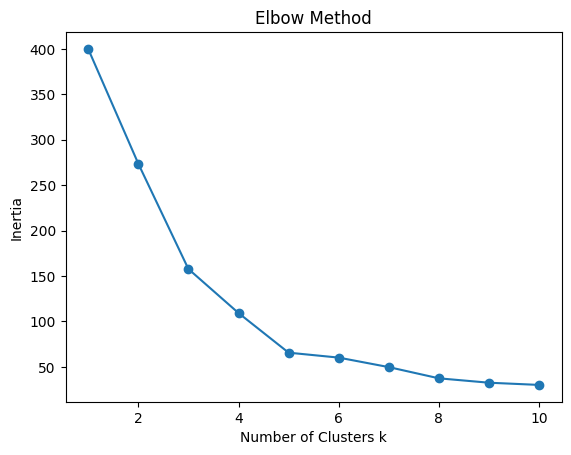

In [6]:
# Find optimal k (Elbow + Silhouette)
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(k_range, inertia, 'o-')
plt.xlabel("Number of Clusters k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [10]:
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    print(f"Silhouette score for k={k}: {silhouette_score(X_scaled, labels):.3f}")

Silhouette score for k=2: 0.397
Silhouette score for k=3: 0.467
Silhouette score for k=4: 0.494
Silhouette score for k=5: 0.555
Silhouette score for k=6: 0.514
Silhouette score for k=7: 0.502
Silhouette score for k=8: 0.455
Silhouette score for k=9: 0.457
Silhouette score for k=10: 0.445


In [8]:
# Final clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

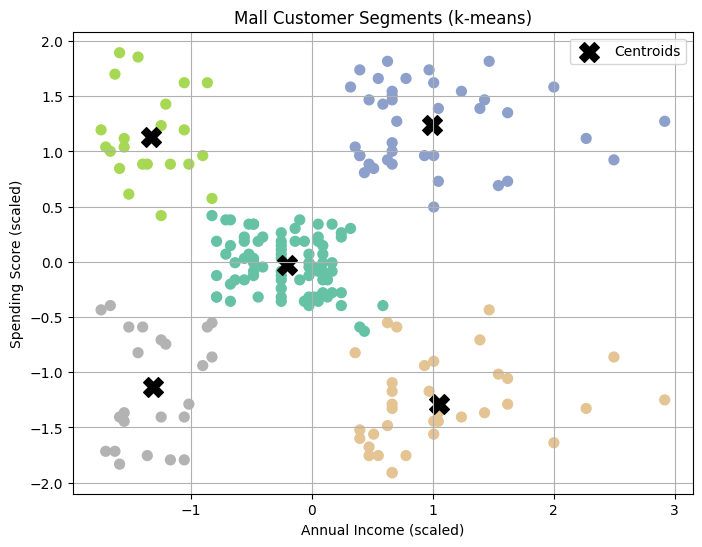

In [9]:
# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set2', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='black', marker='X', s=200, label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Mall Customer Segments (k-means)")
plt.legend()
plt.grid(True)
plt.show()